### Project 2 : Real-World Data Wrangling with Python
#### Created By: Bessan Hussein 

#### introduction to project :
##### Real-World Data Wrangling with Python is an Analyzing the Relationship Between GDP per Capita and Population Growth Across Different Regions 

###### In an increasingly interconnected world, understanding the dynamics of economic growth and population changes is crucial for policymakers, researchers, and stakeholders. This project aims to explore the relationship between GDP per capita and population growth across various regions over the years. By analyzing these two critical indicators, we can gain insights into how economic prosperity is distributed and how it correlates with demographic trends.


#### Preparing the Dataset In this project
##### I used three datasets. I obtained the first dataset called “World Population Dataset by Countries” using a manual approach, the second dataset is "countries_gdp_hist"; and the third is "organizations_gdp_hist" using a program approach

#### To read the dataSet Programmety approach :
##### I made this code as shown -->

In [70]:
import os

# Set the Kaggle dataset path
dataset_path = 'fredericksalazar/pib-gdp-global-by-countries-since-1960-to-2021'

# Download the dataset
os.system(f'kaggle datasets download -d {dataset_path}')

# Unzip the downloaded dataset
import zipfile

# The downloaded file will be a zip file
zip_file_name = 'pib-gdp-global-by-countries-since-1960-to-2021.zip'

# Unzip the downloaded dataset
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('gdp_dataset')

print("GDP dataset downloaded and extracted successfully.")

GDP dataset downloaded and extracted successfully.


#### To read the dataset manually approach:
##### I made this code as shown -->

In [71]:
import pandas as pd

population_data = pd.read_csv('./World-population-by-countries-dataset.csv')
import pandas as pd
import os

# Check if the file exists
import pandas as pd
import os

# Define file paths
file_path_countries_gdp_hist = './gdp_dataset/countries_gdp_hist.csv'
file_path_organizations_gdp_hist = './gdp_dataset/organizations_gdp_hist.csv'

# Check if the first file exists
if os.path.exists(file_path_countries_gdp_hist):
    try:
        # Attempt to read the CSV with different options
        countries_gdp = pd.read_csv(file_path_countries_gdp_hist, encoding='utf-8', on_bad_lines='skip')
        print("Countries GDP Data Loaded Successfully:")
        print(countries_gdp.head())
    except pd.errors.ParserError as e:
        print("ParserError:", e)
else:
    print("Countries GDP file does not exist.")

# Check if the second file exists
if os.path.exists(file_path_organizations_gdp_hist):
    try:
        # Attempt to read the CSV with different options
        gdp_data = pd.read_csv(file_path_organizations_gdp_hist, encoding='utf-8', on_bad_lines='skip')
        print("Organizations GDP Data Loaded Successfully:")
        print(gdp_data.head())
    except pd.errors.ParserError as e:
        print("ParserError:", e)
else:
    print("Organizations GDP file does not exist.")



Countries GDP Data Loaded Successfully:
  country_code;region_name;sub_region_name;intermediate_region;country_name;income_group;year;total_gdp;total_gdp_million;gdp_variation
0  ABW;AMERICAS;LATIN AMERICA AND THE CARIBBEAN;C...                                                                                   
1  ABW;AMERICAS;LATIN AMERICA AND THE CARIBBEAN;C...                                                                                   
2  ABW;AMERICAS;LATIN AMERICA AND THE CARIBBEAN;C...                                                                                   
3  ABW;AMERICAS;LATIN AMERICA AND THE CARIBBEAN;C...                                                                                   
4  ABW;AMERICAS;LATIN AMERICA AND THE CARIBBEAN;C...                                                                                   
Organizations GDP Data Loaded Successfully:
  country_code;organization_name;region;income_group;year;total_gdp;total_gdp_million;gdp_variation


#### After checking all data sets exist in two approaches, manual and programmatic
#### Then I started to assess them for data quality and structural (tidiness) issues. This step is essential to ensure that the datasets are ready for cleaning and eventual analysis.

### Step 1: Assess Data Quality
##### 1. Completeness
Check for missing values in critical variables.

In [27]:
# Check for missing values in the population dataset
print("Missing Values in Population Data:")
print(population_data.isnull().sum())

# Check for missing values in the GDP dataset
print("\nMissing Values in GDP Data:")
print(gdp_data.isnull().sum())

Missing Values in Population Data:
Country Name    0
Country Code    0
1960            2
1961            2
1962            2
               ..
2017            2
2018            2
2019            2
2020            2
2021            2
Length: 64, dtype: int64

Missing Values in GDP Data:
country_code;organization_name;region;income_group;year;total_gdp;total_gdp_million;gdp_variation    0
dtype: int64


#### 2. Validity
##### Check if the data values fall within acceptable ranges or formats.

For the population dataset, ensure that population values are non-negative integers.

For the GDP dataset, ensure that GDP values are non-negative and in a reasonable range.

In [28]:
print("Population Data Columns:")
print(population_data.columns)

Population Data Columns:
Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021'],
      dtype='object')


In [72]:
# Check the first few rows to understand the structure
print("Population Data Sample:")
print(population_data.head())

Population Data Sample:
                  Country Name Country Code         1960         1961  \
0                        Aruba          ABW      54208.0      55434.0   
1  Africa Eastern and Southern          AFE  130836765.0  134159786.0   
2                  Afghanistan          AFG    8996967.0    9169406.0   
3   Africa Western and Central          AFW   96396419.0   98407221.0   
4                       Angola          AGO    5454938.0    5531451.0   

          1962         1963         1964         1965         1966  \
0      56234.0      56699.0      57029.0      57357.0      57702.0   
1  137614644.0  141202036.0  144920186.0  148769974.0  152752671.0   
2    9351442.0    9543200.0    9744772.0    9956318.0   10174840.0   
3  100506960.0  102691339.0  104953470.0  107289875.0  109701811.0   
4    5608499.0    5679409.0    5734995.0    5770573.0    5781305.0   

          1967  ...         2012         2013         2014         2015  \
0      58044.0  ...     102565.0     1031

In [73]:
# Reshape the population data
population_melted = population_data.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Population')

# Convert 'Year' to integer type and 'Population' to float
population_melted['Year'] = population_melted['Year'].astype(int)
population_melted['Population'] = population_melted['Population'].astype(float)

# Check the reshaped data
print("Reshaped Population Data Sample:")
print(population_melted.head())

Reshaped Population Data Sample:
                  Country Name Country Code  Year   Population
0                        Aruba          ABW  1960      54208.0
1  Africa Eastern and Southern          AFE  1960  130836765.0
2                  Afghanistan          AFG  1960    8996967.0
3   Africa Western and Central          AFW  1960   96396419.0
4                       Angola          AGO  1960    5454938.0


In [74]:
# Check validity for population data after reshaping
invalid_population = population_melted[population_melted['Population'] < 0]
print("\nInvalid Population Data:")
print(invalid_population)


Invalid Population Data:
Empty DataFrame
Columns: [Country Name, Country Code, Year, Population]
Index: []


In [75]:
# Check for missing values in the population dataset
print("Missing Values in Population Data:")
print(population_data.isnull().sum())

# Check for missing values in the GDP dataset for countries
print("\nMissing Values in Countries GDP Data:")
print(pollution_data.isnull().sum())

# Check for missing values in the GDP dataset for organizations
print("\nMissing Values in Organizations GDP Data:")
print(gdp_data.isnull().sum())

Missing Values in Population Data:
Country Name    0
Country Code    0
1960            2
1961            2
1962            2
               ..
2017            2
2018            2
2019            2
2020            2
2021            2
Length: 64, dtype: int64

Missing Values in Countries GDP Data:
country_code;region_name;sub_region_name;intermediate_region;country_name;income_group;year;total_gdp;total_gdp_million;gdp_variation    0
dtype: int64

Missing Values in Organizations GDP Data:
country_code;organization_name;region;income_group;year;total_gdp;total_gdp_million;gdp_variation    0
dtype: int64


In [76]:
# Assuming you have already reshaped the population data
population_melted = population_data.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Population')

# Check the column names of the reshaped DataFrame
print("Columns in Reshaped Population Data:")
print(population_melted.columns)

# Check validity for population data after reshaping
invalid_population = population_melted[population_melted['Population'] < 0]
print("\nInvalid Population Data:")
print(invalid_population)

Columns in Reshaped Population Data:
Index(['Country Name', 'Country Code', 'Year', 'Population'], dtype='object')

Invalid Population Data:
Empty DataFrame
Columns: [Country Name, Country Code, Year, Population]
Index: []


In [77]:
# Check for missing values in the reshaped population data
missing_values_population = population_melted.isnull().sum()
print("\nMissing Values in Reshaped Population Data:")
print(missing_values_population)


Missing Values in Reshaped Population Data:
Country Name      0
Country Code      0
Year              0
Population      105
dtype: int64


In [78]:
# Identify rows with missing population values
missing_population_data = population_melted[population_melted['Population'].isnull()]
print("\nMissing Population Data:")
print(missing_population_data)


Missing Population Data:
             Country Name Country Code  Year  Population
110        Not classified          INX  1960         NaN
196    West Bank and Gaza          PSE  1960         NaN
376        Not classified          INX  1961         NaN
462    West Bank and Gaza          PSE  1961         NaN
642        Not classified          INX  1962         NaN
...                   ...          ...   ...         ...
15804      Not classified          INX  2019         NaN
16029             Eritrea          ERI  2020         NaN
16070      Not classified          INX  2020         NaN
16295             Eritrea          ERI  2021         NaN
16336      Not classified          INX  2021         NaN

[105 rows x 4 columns]


In [79]:
# Drop rows with missing population values
population_melted.dropna(subset=['Population'], inplace=True)

# Check the shape of the DataFrame after dropping
print("\nShape of Population Data after Dropping Missing Values:")
print(population_melted.shape)


Shape of Population Data after Dropping Missing Values:
(16387, 4)


In [80]:
# Check for missing values in the GDP data
missing_values_gdp = gdp_data.isnull().sum()
print("\nMissing Values in GDP Data:")
print(missing_values_gdp)


Missing Values in GDP Data:
country_code;organization_name;region;income_group;year;total_gdp;total_gdp_million;gdp_variation    0
dtype: int64


In [81]:
import pandas as pd

# Load the GDP dataset with the correct delimiter
gdp_data = pd.read_csv('./gdp_dataset/organizations_gdp_hist.csv', delimiter=';', encoding='utf-8', on_bad_lines='skip')

# Check the column names of the GDP DataFrame
print("GDP Data Columns:")
print(gdp_data.columns)

# Check the first few rows of the GDP DataFrame
print("GDP Data Sample:")
print(gdp_data.head())

GDP Data Columns:
Index(['country_code', 'organization_name', 'region', 'income_group', 'year',
       'total_gdp', 'total_gdp_million', 'gdp_variation'],
      dtype='object')
GDP Data Sample:
  country_code organization_name   region income_group  year     total_gdp  \
0          AFE               NaN  NO DATA    AGREGADOS  1960  2.421063e+10   
1          AFE               NaN  NO DATA    AGREGADOS  1961  2.496398e+10   
2          AFE               NaN  NO DATA    AGREGADOS  1962  2.707880e+10   
3          AFE               NaN  NO DATA    AGREGADOS  1963  3.177575e+10   
4          AFE               NaN  NO DATA    AGREGADOS  1964  3.028579e+10   

   total_gdp_million  gdp_variation  
0       24210.632546       0.000000  
1       24963.977551       0.468736  
2       27078.797299       7.869709  
3       31775.749181       5.622374  
4       30285.794057       4.690458  


In [82]:
# Check for missing values in the GDP data
missing_values_gdp = gdp_data.isnull().sum()
print("\nMissing Values in GDP Data:")
print(missing_values_gdp)

# Check for invalid GDP values using the correct column name
# Assuming the column name for total GDP is 'total_gdp'
invalid_gdp = gdp_data[gdp_data['total_gdp'] < 0]  # Adjust the column name as necessary
print("\nInvalid GDP Data:")
print(invalid_gdp)


Missing Values in GDP Data:
country_code           0
organization_name    128
region                 0
income_group           0
year                   0
total_gdp              0
total_gdp_million      0
gdp_variation          0
dtype: int64

Invalid GDP Data:
Empty DataFrame
Columns: [country_code, organization_name, region, income_group, year, total_gdp, total_gdp_million, gdp_variation]
Index: []


In [83]:
# Example: Drop rows with missing GDP values
gdp_data.dropna(subset=['total_gdp'], inplace=True)

# Example: Drop invalid GDP values
gdp_data = gdp_data[gdp_data['total_gdp'] >= 0]

In [84]:
# Convert the 'Year' column in population_melted to integer
population_melted['Year'] = population_melted['Year'].astype(int)

# Now try merging the datasets again
merged_data = pd.merge(population_melted, gdp_data, how='inner', left_on=['Country Code', 'Year'], right_on=['country_code', 'year'])

# Check the merged data
print("\nMerged Data Sample:")
print(merged_data.head())


Merged Data Sample:
                     Country Name Country Code  Year   Population  \
0     Africa Eastern and Southern          AFE  1960  130836765.0   
1      Africa Western and Central          AFW  1960   96396419.0   
2                      Arab World          ARB  1960   92197715.0   
3  Central Europe and the Baltics          CEB  1960   91401764.0   
4                 Channel Islands          CHI  1960     109419.0   

  country_code             organization_name   region  income_group  year  \
0          AFE                           NaN  NO DATA     AGREGADOS  1960   
1          AFW                           NaN  NO DATA     AGREGADOS  1960   
2          ARB                EL MUNDO ÁRABE  NO DATA     AGREGADOS  1960   
3          CEB  EUROPA CENTRAL Y DEL BÁLTICO  NO DATA     AGREGADOS  1960   
4          CHI               ISLAS DEL CANAL  NO DATA  INGRESO ALTO  1960   

      total_gdp  total_gdp_million  gdp_variation  
0  2.421063e+10       24210.632546            0.0

In [85]:
# Drop redundant columns
merged_data.drop(columns=['country_code', 'year'], inplace=True)

In [86]:
# Check for missing values in the merged dataset
missing_values_merged = merged_data.isnull().sum()
print("\nMissing Values in Merged Data:")
print(missing_values_merged)


Missing Values in Merged Data:
Country Name           0
Country Code           0
Year                   0
Population             0
organization_name    124
region                 0
income_group           0
total_gdp              0
total_gdp_million      0
gdp_variation          0
dtype: int64


In [87]:
# Drop rows with missing organization_name
merged_data.dropna(subset=['organization_name'], inplace=True)

# Check the shape of the DataFrame after dropping
print("\nShape of Merged Data after Dropping Missing Values:")
print(merged_data.shape)


Shape of Merged Data after Dropping Missing Values:
(2976, 10)


In [88]:
# Impute missing values in organization_name with "Unknown" using assign
merged_data = merged_data.assign(organization_name=merged_data['organization_name'].fillna('Unknown'))

# Check the number of missing values after imputation
missing_values_after_imputation = merged_data['organization_name'].isnull().sum()
print("\nMissing Values in organization_name after Imputation:")
print(missing_values_after_imputation)


Missing Values in organization_name after Imputation:
0


In [89]:
# Save the cleaned merged data
merged_data.to_csv('cleaned_merged_data_population_gdp.csv', index=False)
print("Cleaned merged data has been saved successfully.")

Cleaned merged data has been saved successfully.


#### Research Question:
##### "How does GDP per capita relate to population growth across different regions over the years?"

#### Step 2: Prepare the data for analysis
##### To answer this question, I needed to calculate GDP per capita and prepare the data for visualization.
##### Calculating GDP per capita: I did this by dividing the GDP by the population for each country and each year.

In [91]:
# Calculate GDP per capita
merged_data['gdp_per_capita'] = merged_data['total_gdp'] / merged_data['Population']

#### Step 3: Create Visualizations
###### I created two visualizations to support my findings:

#### Line Plot of GDP per Capita Over Time by Region: 
###### This shows how GDP per capita has changed over time for different regions.

#### Scatter Plot of GDP per Capita vs. Population:
###### This illustrates the relationship between GDP per capita and population size.

#### Line Plot of GDP per Capita Over Time by Region: 

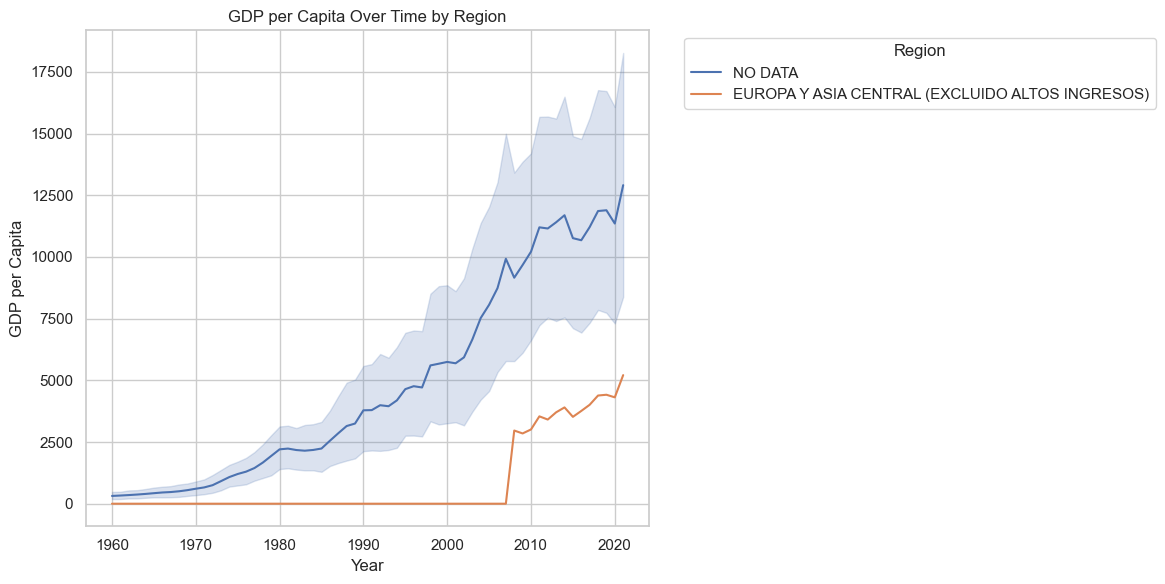

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Visualization 1: Line Plot of GDP per Capita Over Time by Region
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='Year', y='gdp_per_capita', hue='region', estimator='mean')
plt.title('GDP per Capita Over Time by Region')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


####  Interpret the Visualizations
##### Line Plot of GDP per Capita Over Time by Region
Interpretation: This line plot shows the trend of GDP per capita over the years for different regions. You might observe that some regions, such as North America or Western Europe, have consistently higher GDP per capita compared to others, like Sub-Saharan Africa. This indicates that economic growth is not uniform across regions and may reflect differences in economic policies, resources, and development strategies.

Insights: The visualization helps to identify periods of economic growth or decline in specific regions. For example, if a region shows a significant increase in GDP per capita during a specific decade, it may correlate with economic reforms or global events that influenced economic performance.


#### Scatter Plot of GDP per Capita vs. Population:

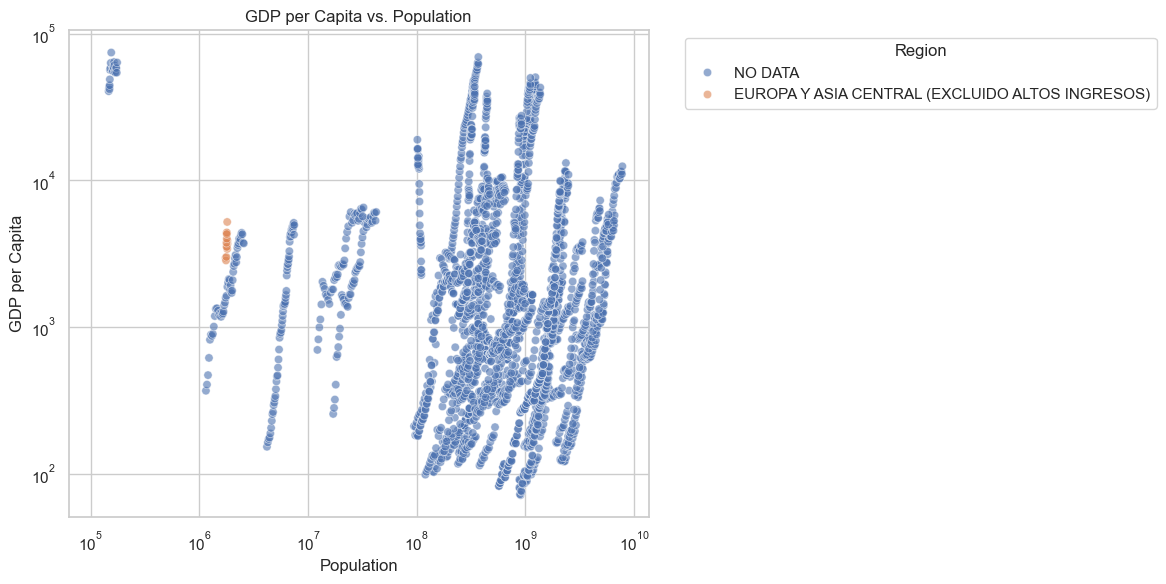

In [93]:
# Visualization 2: Scatter Plot of GDP per Capita vs. Population
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='Population', y='gdp_per_capita', hue='region', alpha=0.6)
plt.title('GDP per Capita vs. Population')
plt.xlabel('Population')
plt.ylabel('GDP per Capita')
plt.xscale('log')  # Use log scale for better visualization
plt.yscale('log')  # Use log scale for better visualization
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Scatter Plot of GDP per Capita vs. Population
Interpretation: This scatter plot illustrates the relationship between GDP per capita and population size. You may notice that countries with larger populations tend to have a wider range of GDP per capita values. Some populous countries like China and India may have lower GDP per capita compared to smaller, wealthier nations.

Insights: The log-log scale helps to visualize the relationship more clearly, showing that while larger populations can contribute to higher total GDP, they do not necessarily lead to higher GDP per capita. This suggests that population size alone is not a determinant of economic prosperity; factors such as economic structure, governance, and investment in human capital also play crucial roles.